# Python Problem Set

**Programming Tools (ΥΦΥ103)**

Implemented by: **Anastasios-Faidon Retselis (AEM: 4394)**

# Exercise 1

## Problem statement

Write a function that will accept as argument one natural number $n > 2$. The function must calculate all prime numbers that belong in $[2,n]$ and return them as a list (either a built-in list, or a numpy list).

## Solution 

The code below consists of two parts:

1) The function `primes_list_until_number(n)`
   - This is the main function driving the code. It accepts the input natural number n>2 (raising the appropriate errors if the conditions for n are not met) and returns the list based on the problem statement.
   
2) Demo code
   - A demo code to test the function `primes_list_until_number(n)` is provided, it checks for two numbers: 27 and 97 and prints the output of the function.

In [1]:
def primes_list_until_number(n):
    # Input: n > 2 (integer)
    # Output: primes_list, contains all primes until n
    primes_list = []

    if n <= 2:
        raise ValueError('Input number n must be greater than 2')
    if not isinstance(n, int):
        raise ValueError('Input number n must be a natural number')

    for i in range(2, n+1):
        check = 1
        for j in range(2, i):
            if i % j == 0:
                check = 0
                break
        if check == 1:
            primes_list.append(i)

    return primes_list


# Demo code
number = 27
result = primes_list_until_number(number)
print(result)

number = 97
result = primes_list_until_number(number)
print(result)


[2, 3, 5, 7, 11, 13, 17, 19, 23]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


# Exercise 2

## Problem statement

The equation $x^{2}-1+ln(x+1)=0$ has a unique real root in $[0, 1]$. Write a script that will implement the Newton-Raphson method in order approximate that root with an accuracy criterion of $|x_{k+1}-x_{k}|<10^{-4}$. Plot the function $f(x)=x^{2}-1+ln(x+1)$ in $[0, 1]$ with matplotlib.

## Solution 

We will use the Newton-Raphson method to solve the equation $x^{2}-1+ln(x+1)=0$, which is in the form of $f(x)=0$. We can calculate the derivative as:

$$
\begin{split}
   f'(x) = 2x+\frac{1}{x+1}
\end{split}
$$

We are ready to input $f(x)$ and $f'(x)$ as `lambda` functions and solve the equation using the Newton-Raphson method in the given interval. The stopping condition is the one specified above, namely $|x_{k+1}-x_{k}|<10^{-4}$. The code will output the root and number of iterations required to reach this root. It will also plot the function $f(x)$ in the interval $[0,1]$ using the `matplotlib` package.

Newton-Raphson Method:
Root found (after 4 iterations)! x_root = 0.68958


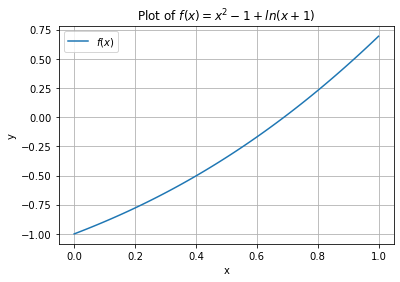

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Newton-Raphson method

# Function Definition
f = lambda x: pow(x, 2) - 1 + np.log(x + 1)
fdot = lambda x: 2 * x + (1 / (x + 1))

# Initial search condition and max iterations definition
x0 = 1
xr = x0
iterations = 0
max_iterations = 200

# Main Loop
while iterations < max_iterations:
    xr_old = xr
    xr = xr_old - (f(xr_old) / fdot(xr_old))
    iterations += 1
    if abs(xr - xr_old) < pow(10, -4):
        break

# Print and Plot Results
print('Newton-Raphson Method:')
if iterations < max_iterations:
    print('Root found (after %d iterations)! x_root = %.5f' % (iterations, xr))
else:
    print('Max iterations reached without solution!')

x_plot = np.linspace(0, 1, 100)
y_plot = f(x_plot)

plt.figure()
plt.plot(x_plot, y_plot, label=r'$f(x)$')
plt.title(r'Plot of $f(x)=x^{2}-1+ln(x+1)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


# Exercise 3

## Problem statement

Consider the differential equation $y'(x)=y(x)cos(x+y(x)),\;y(0)=1$. Write a script that will solve the differential equation with Runge-Kutta 4th order method in the interval $[0, 10]$. Plot the numerical solution with matplotlib.

## Solution

The code below consists of three main parts:

1) The function `runge_kutta_4(x0, y0, xmax, h)`
   - This function implements the fourth order Runge Kutta method
   - It outputs two lists `xn` and `yn`, which contain the x and y values of the solution at each step run. These lists can be then used to plot the function (provided that the value h is adequate).
  
2) The function `f(x, y)`
   - This function is used to calculate the values of $f(x,y)$, assuming the differential equation is at $y'(x)=f(x,y)$ form.
  
3) Test code
   - This parts defines the initial conditions, step size and search interval. It is also used to plot the two lists which it receives as output from `runge_kutta_4(x0, y0, xmax, h)`

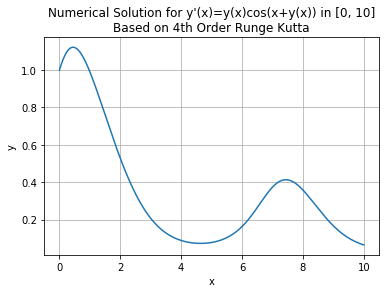

In [3]:
import math as m
import matplotlib.pyplot as plt


def runge_kutta_4(x0, y0, xmax, h):
    xn = [x0]
    yn = [y0]
    i = 0
    while xn[i] < xmax:
        # Calculate k values
        k1 = h * f(xn[i], yn[i])
        k2 = h * f(xn[i] + (h / 2), yn[i] + (k1 / 2))
        k3 = h * f(xn[i] + (h / 2), yn[i] + (k2 / 2))
        k4 = h * f(xn[i] + h, yn[i] + k3)
        # Compute y value and append to list
        yn.append(yn[i] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4))
        i += 1
        # Compute next x
        xn.append(xn[i - 1] + h)
    return xn, yn


def f(x, y):
    # Assuming y'(x)=f(x,y)
    # This example uses y'(x)=y(x)*cos(x+y(x))
    return y * m.cos(x + y)


# Test the implementation:
# Define initial conditions, search interval and step size
x_0 = 0
y_0 = 1
interval = [0, 10]
step = 0.001
# Extract and plot the solution
xplot, yplot = runge_kutta_4(x_0, y_0, interval[1], step)
plt.plot(xplot, yplot)
plt.title('Numerical Solution for y\'(x)=y(x)cos(x+y(x)) in [0, 10]'
          '\nBased on 4th Order Runge Kutta')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
